In [5]:
from astropy.io import ascii
import astropy.coordinates as coord
import astropy.units as u
import numpy as np


In [6]:

wp=ascii.read("/home/tony/Desktop/SouthAfrica/SourceLists/ATCA4Jy.csv")
names=wp['Name']
rad=coord.Angle(wp['RA2000'],unit=u.hour).degree
decd=coord.Angle(wp['Dec2000'], unit=u.degree).degree
print len(names), len(decd), names[0], decd[0:4]

31 31 0023-263 [-26.03694444 -23.15444444 -71.07638889 -65.7525    ]


In [7]:
def ecliptic(r):
    ec=23.43487*np.sin(np.radians(r))
    return ec

def galaxy(r):
    #atan(A*sin((x-282.25)/57.29577)
    A=2.049016 # radians(180-62.6)
    g=np.degrees(np.arctan(A*np.sin(radians(r-282.25))))
    return g
    

In [8]:
ecliptic(90.)

23.43487

Populating the interactive namespace from numpy and matplotlib


/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


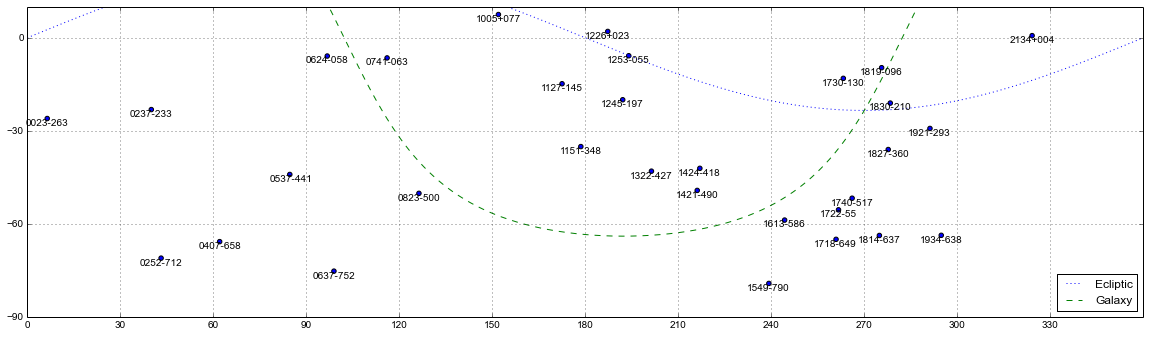

In [9]:
%pylab inline
pylab.subplots_adjust(bottom=0.1)
#  x range from 0-360 is 360deg
# y ranges from -90 to +10 = 100 deg
w=20.0 #width
h=w*100./360. # scale in dec
pylab.figure(figsize=(w,h))
pylab.xlim(0,360)
pylab.ylim(-90,10)
pylab.scatter(rad,decd)
# plot in galaxy
r=arange(0,360,.5)
pylab.xticks(range(0,360,30))
pylab.yticks(range(-90,10,30))
pylab.grid()
eplt,=pylab.plot(r,ecliptic(r),'b:')
gplt,=pylab.plot(r,galaxy(r),'g--')
for n in range(len(wp)):
    lab=str(names[n])
    x=rad[n]
    y=decd[n]
    #print lab, x, y
    pylab.annotate(lab, xy = (x, y), xytext = (0, 0),xycoords='data',textcoords='offset points',\
                   horizontalalignment='center', verticalalignment='top')
#plt.legend([line_up, line_down], ['Line Up', 'Line Down'])
pylab.legend([eplt,gplt],['Ecliptic','Galaxy'],loc=4) # 4 is bottom right corner
pylab.savefig('ATCAcals.png',orientation='landscape', papertype='a4', format='png',dpi=100,)
pylab.show()